In [2]:
import pyAudioKits.audio as ak

The analysis of musical tones and noise in the previous section was done in the time domain. In this section we will introduce the concept of frequency domain and the way to analyze audio signals in it.

# Fourier transform

## Continuous-time signal Fourier transform

We say that the continuous time period signal can be expanded into a fundamental wave of frequency $\omega_0$ and harmonics of frequency $(k+1)\omega_0 (k=1,2,...) $. This means that not only can we use the original $x(t)$ to represent a continuous time period signal, but we can use the frequency and amplitude to represent a continuous time period signal as long as we know the frequency and amplitude of the fundamental and harmonics. Thus, we now assume that there is a frequency axis with an infinite number of **frequency points $\omega$**, and we can try to map the original one-dimensional signal $x(t)$ on the time axis to the frequency axis as $X(j\omega)$, completing the mapping from the time domain to the frequency domain.

Using the least squares method to make the difference of energy between the time domain representation and the frequency domain representation minimized. The conclusion to reach this condition is: let the value of all frequency points be $a_k$ multiplied by $2\pi$. Expressed as the **spectral density function**, we have $X(j\omega)=\displaystyle\sum_{k=-∞}^∞2\pi a_k\delta(\omega-k\omega_0)$. It can be seen that **the spectral density function of a periodic signal is a linear superposition of discrete impulse functions**. This function can be reduced to a Fourier series representation in the time domain $x(t)=\displaystyle\sum_{k=-∞}^∞a_ ke^{jk\omega_0t}$ by $x(t)=\frac{1}{2\pi}\displaystyle\int_{-∞}^∞X(j\omega)e^{j\omega t}d\omega$. 

So can non-periodic signals be mapped to the frequency domain? The answer is yes. If **the fundamental frequency $\omega_0$ is infinitely small, i.e., the fundamental period $T$ is infinitely large**, then the frequency domain properties of **any (periodic or not) signal** can be expressed, and at this point it is generalized from the Fourier series to Fourier transform: the fundamental frequency $\omega_0$ is infinitely small, so $k\omega_0$ is considered as a continuous value $\omega$ , $X(j\omega)=\displaystyle\int_{-∞}^∞x(t)e^{-j\omega t}dt$. At this point, the **integrated equation** of the continuous-time Fourier transform is obtained as $x(t)=\frac{1}{2\pi}\displaystyle\int_{-∞}^∞X(j\omega)e^{j\omega t}d\omega$, and the **analytical equation** is $X(j\omega)=\displaystyle\int_{-∞}^∞x(t)e^{-j\omega t}dt$. It can be seen that **the spectral density function of a nonperiodic signal is a continuous function**.

When the **period of the continuous-time periodic signal gradually expands**, $\omega_0$ gradually shrinks, and the **impulse function consisting of $X(j\omega)$ becomes more and more dense**. When the **period is infinitely large**, $\omega_0$ is infinitely small, and $X(j\omega)$** becomes a continuous function**, and the continuous-time non-periodic signal spectral density function is obtained.

## Fourier transform of discrete-time signals

But the signals we store in the computer are digital signals, that is, discrete-time signals, so how do they map to the frequency domain? 

Remember that the analog to digital signal (which in our case is also equivalent to the continuous time signal to the discrete time signal) uses a sampling operation. The signal is multiplied in the time domain by the impulsive string $p(t)=\displaystyle\sum_{n=-∞}^{+∞}\delta(t-nT_s)$. The sampled time domain is represented as $x_s(t)=x(t)p(t)=\displaystyle\sum_{n=-∞}^{+∞}x(t)\delta(t-nT_s)$ . The sampled frequency domain is represented as $X_s(j\omega)=\frac{1}{2\pi}X(j\omega)*P(j\omega)=\frac{1}{T_s}\displaystyle\sum_{k=-∞}^{+∞}X(j(\omega-k\omega_s))$ . We find that at this point **$X_s(j\omega)$ is the result of a periodic extension of $X(j\omega)$ on the spectrum with the sampling frequency as the base**. Its period is $\omega_s=2\pi/T_s$ and it contains all the spectral information in one period. At this point, the **integrated equation** of the Fourier transform of the discrete-time signal is obtained as $x[n]=\frac{1}{2\pi}\displaystyle\int_{\frac{2\pi}{T_s}}X(j\omega)e^{j\omega nT_s}d\omega$, and the **analytical equation** is obtained as $X(j\omega)=\displaystyle \sum_{n=-∞}^{+∞}x[n]e^{-j\omega nT_s}$. 

By now the integrated and analytical equations are related to the sampling period $T_s$. To make them independent to $T_s$, we normalize the frequency domain by a factor $T_s$ (i.e., the inverse of the sampling rate), denoted as $X(e^ {j\omega})=X(j\omega T_s)$. Then we obtain the **integrated equation** for the Fourier transform of the discrete-time signal as $x[n]=\frac{1}{2\pi}\displaystyle\int_{2\ pi}X(e^{j\omega})e^{j\omega n}d\omega$, and the **analytic equation** is $X(e^{j\omega})=\displaystyle \sum_{n=-∞}^{+∞}x[n]e^{-j\omega n}$. In $X(e^{j\omega})$, each $1 rad/s$ of $\omega$ **actually represents the frequency** of $\frac{1}{2\pi T_s}Hz (\frac{1}{T_s}rad/s)$. $X(e^{j\omega})$ with $2\pi$ as the period.

## Discrete Fourier Transform

Now the question comes up again, remember why we sampled the analog signal $x(t),-∞<t<∞$ into $x[n],0≤n<N_{max}$? This is because the computer cannot store the original analog signal, which is continuous and may still be infinite and non-causal. Then the spectral density function $X(e^{j\omega}),-∞<\omega<∞$ actually faces the same problem. We also need to perform some "sampling" operations on this spectral density function.

Let the periodic impulse string $\tilde p[n]=\displaystyle\sum_{r=-∞}^∞\delta[n-rN]$, then we have $\tilde x[n]=x[n]*\tilde p[n]$, while $\tilde X(e^{j\omega})=X(e^{j\omega})\tilde P(e^{j\omega})=X(e^{j\omega})\displaystyle\sum_{k=-∞}^∞\frac{2\pi}{N}\ delta(\omega-\frac{2\pi k}{N})$, then we have $X[k]=X(e^{j\omega})|_{\omega=\frac{2\pi k}{N}}$, thus completing the sampling in the frequency domain. Using $W_N$ instead of $e^{-j\frac{2\pi}{N}}$ gives: 

$X[k]=\displaystyle \sum_{n=0}^{N-1} \tilde x[n]e^{-jk(\frac{2\pi}{N})n}=\sum_{n=0}^{N-1} \tilde x[n]W_N^{kn}$​​​

$\tilde x[n]=\frac{1}{2\pi}\displaystyle\int_{2\pi}X(e^{j\omega})|_{\omega=\frac{2\pi k}{N}}e^{j\omega n}d\omega=\displaystyle\frac{1}{N}\displaystyle\sum_{k=0}^{N-1} X[k]e^{jk(\frac{2\pi}{N})n}=\frac{1}{N}\displaystyle\sum_{k=0}^{N-1} X[k]W_{N}^{-kn}$​

And **time domain** with $N$ as the period for **periodic extension** becomes $\tilde x[n]$. Instead of having $x[n]=\begin{cases}x_d[n]\quad 0≤n<N_{max}\\0\quad others\end{cases}$, we now have $\displaystyle\tilde x[n]=\sum_{r=-∞}^∞x[n-rN]$. **The signal $\tilde x[n]$ after the period extension may have a different frequency component than $x(t)$**.

Originally in $X(e^{j\omega})$, every $1 rad/s$ for $\omega$ **actually represents the frequency** of $\frac{1}{2\pi T_s}Hz(\frac{1}{T_s}rad/s)$. Now we have $\tilde X[k]$ where each $k$ **actually represents** $\frac{1}{T_sN}Hz(\frac{2\pi}{T_sN}rad/s)$ of the frequencies. Each k is said to be a **frequency point** in the spectrum, and the actual frequency represented is the **spectral resolution**. Sampling does not give a complete representation of the spectrum and in some cases misses frequency components in the spectrum, which is known as the **fence effect**. However, the time-frequency domain still satisfies the condition of energy equality, and the energy of the omitted frequency component is leaked to nearby frequency points, resulting in a new frequency component of the signal, which is known as **spectral leakage**.

Remember that $X(e^{j\omega})$ has a period of $\frac{2\pi}{T_s}$? This means that we only need to take $N$ consecutive frequency points in the spectrum to get all the information of the spectrum. Together with the fact that the spectrum of the real signal is symmetric about $\omega=0$, we only need to take $N/2$ consecutive frequency points in the spectrum when we observe the spectrum, i.e. The spectrum is generally plotted by taking only $X[k],0≤k<\frac{N}{2}$.

Since $X[k]$ ar complex numbers, the spectrum is also divided into **amplitude spectrum** and **phase spectrum** as $|X[k]|$ and $\angle X[k] (rad/s)$, respectively.

In [3]:
def periodicExtension(p,N): #Simulation of a function that performs 3 period extensions. p is the signal to be cycle extended, and N is the cycle extension period
    L = 3 * N
    p = ak.concatenate([ak.create_Single_Freq_Audio(0,0,p.sr,L/p.sr),p,ak.create_Single_Freq_Audio(0,0,p.sr,L/p.sr)])
    p1 = p[0:L]
    for i in range(N,len(p.samples)-L,N):
        p1 = p1 + p[i:i+L]
    return p1

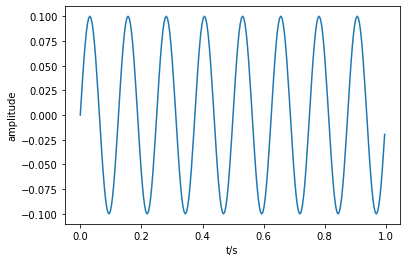

<Figure size 432x288 with 0 Axes>

In [4]:
import pyAudioKits.analyse as aly

p1 = ak.create_Single_Freq_Audio(0.1,8,256,1)   #Create a sine signal with an amplitude of 0.1, a frequency of 8Hz, a sampling rate of 256Hz and a duration of 1s
p1.plot()

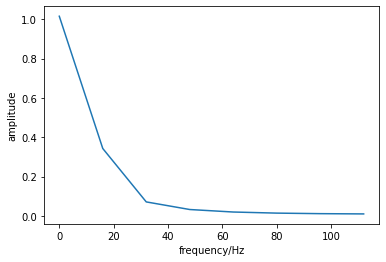

<Figure size 432x288 with 0 Axes>

In [5]:
aly.FFT(p1,16).plot()   #Perform a 16-point Fourier transform and plot the magnitude spectrum by default

x[n] is sampled from the 8Hz sine wave x(t), but the 8Hz peak is not reflected in the amplitude spectrum. Because the spectral resolution at this point is $256/16=16Hz$, which is larger than the signal frequency of 8Hz, the fence effect and spectral leakage occur. 

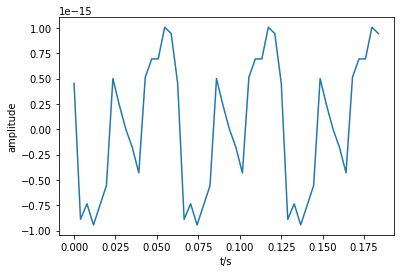

<Figure size 432x288 with 0 Axes>

In [6]:
periodicExtension(p1,16).plot()

Also in the time domain we can see that the $\tilde x[n]$ obtained by period extension at 16 points is no longer at a period of 0.125s.

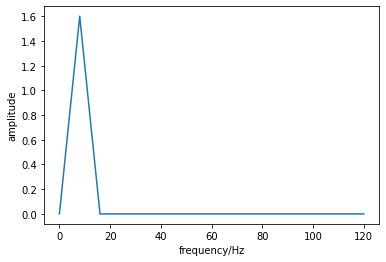

<Figure size 432x288 with 0 Axes>

In [7]:
aly.FFT(p1,32).plot()

When using the 32-point Fourier transform, the spectral resolution at this point is $256/32=8Hz$, which is exactly equal to the signal frequency of 8Hz. therefore we can see that the 8Hz peak is reflected and no fence effect or spectral leakage is observed.

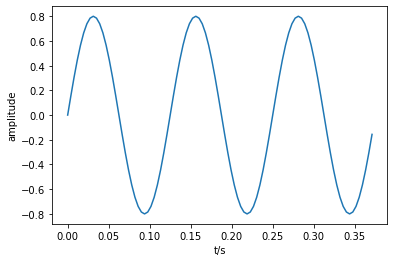

<Figure size 432x288 with 0 Axes>

In [8]:
periodicExtension(p1,32).plot()

From the time domain we can see that $\tilde x[n]$ still has a period of 0.125s.

Observe the correspondence between the true frequency $f$, the true frequency $\omega_s$ expressed in angular frequency, the normalized frequency $\omega$, and the frequency points using different frequency axis scales.

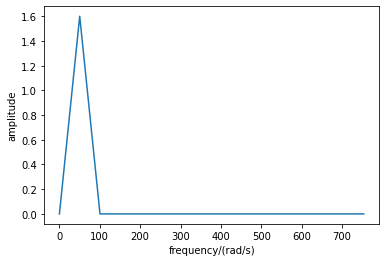

<Figure size 432x288 with 0 Axes>

In [9]:
aly.FFT(p1,32).plot(xlabel="frequency/(rad/s)") #Frequency expressed using angular frequency

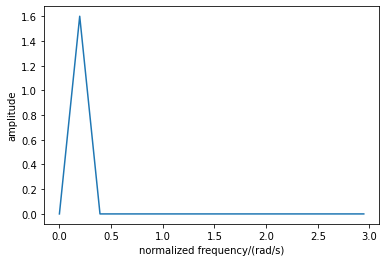

<Figure size 432x288 with 0 Axes>

In [10]:
aly.FFT(p1,32).plot(xlabel="normalized frequency/(rad/s)")  #The normalized angular frequency, 0~sampling rate/2 corresponds to 0~π

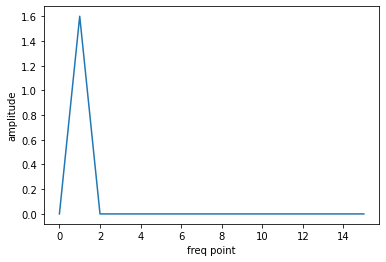

<Figure size 432x288 with 0 Axes>

In [11]:
aly.FFT(p1,32).plot(xlabel="freq point")    #Frequency points. 32-point Fourier transform with 16 frequency points between [0,sampling rate/2)

Then see the case where there are two frequency components in the signal (8Hz and 32Hz).

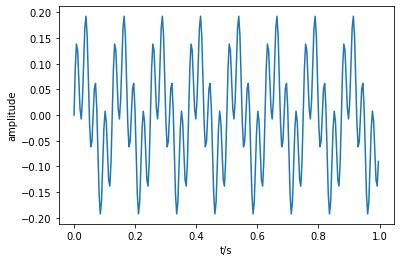

<Figure size 432x288 with 0 Axes>

In [12]:
p2 = p1 + ak.create_Single_Freq_Audio(0.1,32,256,1)
p2.plot()

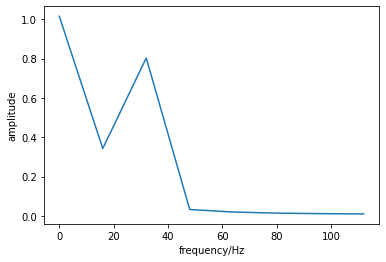

<Figure size 432x288 with 0 Axes>

In [13]:
aly.FFT(p2,16).plot()

When using the 16-point FFT, the spectral resolution is $256/16=16Hz$, which is less than the signal frequency of 32Hz and divisible by 32Hz, but greater than the signal frequency of 8Hz. Therefore, spectral leakage and fence effects do not occur at 32Hz, but do at 8Hz.

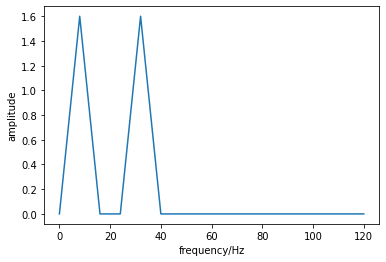

<Figure size 432x288 with 0 Axes>

In [14]:
aly.FFT(p2,32).plot()

When using 32-point FFT, the spectral resolution is $256/32=8Hz$, which is less than the signal frequency and the signal frequency is an integer multiple of the spectral resolution, so the peaks at 8Hz and 32Hz can be distinguished without fence effect and spectral leakage.

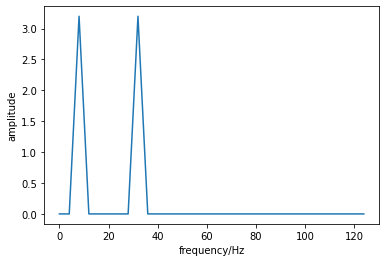

<Figure size 432x288 with 0 Axes>

In [15]:
aly.FFT(p2,64).plot()

The spectrum resolution is $256/64=4Hz$ when using 64-point FFT, and the spectrum is further refined.

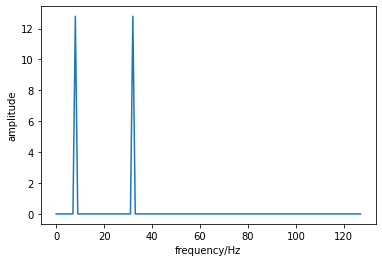

<Figure size 432x288 with 0 Axes>

In [16]:
aly.FFT(p2).plot()

By default, the FFT is performed using the full 256 points with a spectral resolution of $256/256=1Hz$, without spectral leakage and fence effects. 

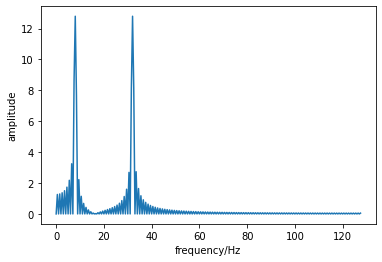

<Figure size 432x288 with 0 Axes>

In [17]:
aly.FFT(p2,512).plot()

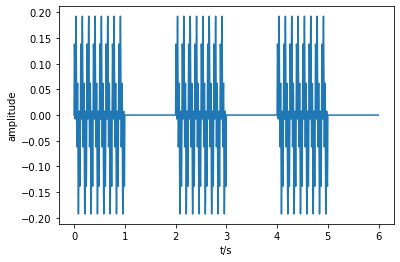

<Figure size 432x288 with 0 Axes>

In [18]:
periodicExtension(p2,512).plot()

The use of 512-point FFT is equivalent to extending 256 samples with 256 zeros before performing the period extension, so new frequency components appear, thus generating spectral leakage and fence effects.

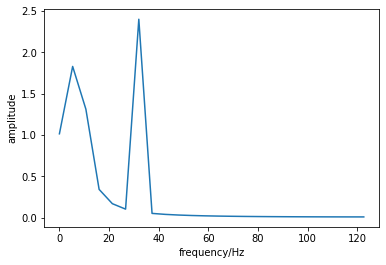

<Figure size 432x288 with 0 Axes>

In [19]:
p3 = p2[0:48]
aly.FFT(p3).plot()

The first 48 sample points are taken to truncate the signal, at which point the FFT is performed using the full 48 points, with a spectral resolution of $256/48=5.3Hz$. $5.3Hz$ is divisible by 32Hz, but not by 8Hz. Therefore, there is no spectral leakage and no fence effect at 32Hz, but there is at 8Hz.

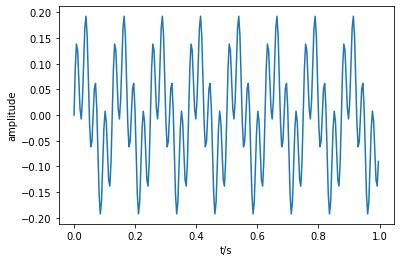

<Figure size 432x288 with 0 Axes>

In [20]:
p2.plot()

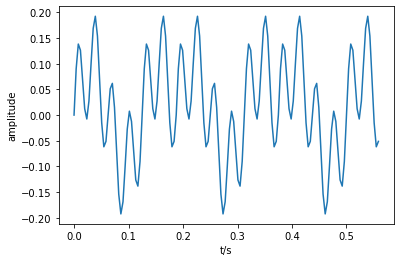

<Figure size 432x288 with 0 Axes>

In [21]:
periodicExtension(p3,48).plot()

The results of the periodic extension also show new frequency components.

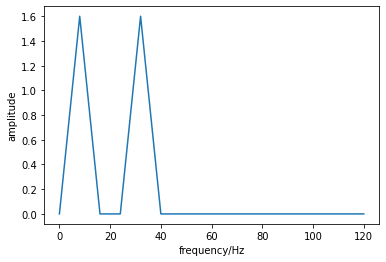

<Figure size 432x288 with 0 Axes>

In [22]:
aly.FFT(p3,32).plot()

Sspectral leakage and fence effects are still not observed using the 32-point FFT.

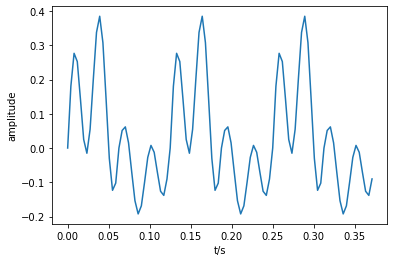

<Figure size 432x288 with 0 Axes>

In [23]:
periodicExtension(p3,32).plot()

No new frequency components appear when periodic extension.

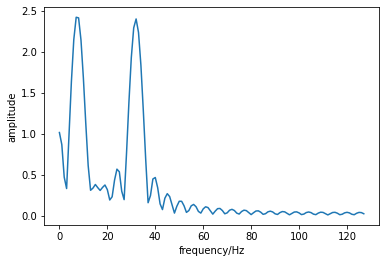

<Figure size 432x288 with 0 Axes>

In [24]:
aly.FFT(p3,256).plot()

As the signal is truncated to 48 points, the 256-point FFT is only an FFT of the signal after zero-padding. Therefore, new frequency components are bound to appear.

After all this, you should have found that the new frequency components brought about by the periodic extension from the time domain and the spectrum leakage brought about by the fence effect from the frequency domain are actually two explanations for the same phenomenon. So is there a unified way to quantify this effect? That is, what is the so-called new frequency component?

Remember how we truncated the audio signal at the beginning? The truncation was done with the window function $w[n]$. $x[n]=x_d[n]w[n]$​​, so $X(e^{j\omega})=\frac{1}{2\pi}\displaystyle\int_{2\pi}X_d(e^{j\theta})W(e^{j(\omega-\theta)})d\theta$​​, in other words, the spectrum of $x[n]$ is the convolution of the spectrum of $x_d[n]$ with the spectrum of the window function. The spectrum of $w[n]=\begin{cases}1\quad 0≤n<N_{max}\\0\quad others\end{cases}$​​ is $W(e^{j\omega})=\frac{1-e^{-j\omega N_{max}}}{1-e^{-j\omega}}$​​. Assume that $x_d[n]=sin\omega_0n$ is sampled from sine wave $x(t)=sin\omega_0t$​​, whose spectrum is $X_d(e^{j\omega})=\frac{\pi}{j}\displaystyle\sum_{l=-∞}^{+∞}[\delta(\omega-\omega_0-2\pi l)-\delta(\omega+\omega_0-2\pi l)]$​​, then $X(e^{j\omega})=\frac{\pi}{j}\displaystyle\sum_{l=-∞}^{+∞}[\frac{1-e^{-j(\omega-\omega_0-2\pi l) N_{max}}}{1-e^{-j(\omega-\omega_0-2\pi l)}}+\frac{1-e^{-j(\omega+\omega_0-2\pi l) N_{max}}}{1-e^{-j(\omega+\omega_0-2\pi l)}}]$​​. If the sampling is $\omega=\frac{2\pi k}{N}$​​, there will be $\begin{aligned}X[k]=X(e^{j\omega})|_{\omega=\frac{2\pi k}{N}}&=\frac{\pi}{j}\displaystyle\sum_{l=-∞}^{+∞}[\frac{1-e^{-j(\frac{2\pi k}{N}-\frac{2\pi k_0}{N}-2\pi l) N_{max}}}{1-e^{-j(\frac{2\pi k}{N}-\frac{2\pi k_0}{N}-2\pi l)}}+\frac{1-e^{-j(\frac{2\pi k}{N}+\frac{2\pi k_0}{N}-2\pi l) N_{max}}}{1-e^{-j(\frac{2\pi k}{N}+\frac{2\pi k_0}{N}-2\pi l)}}]\\&=\frac{\pi}{j}\displaystyle\sum_{l=-∞}^{+∞}[\frac{1-e^{-j(\frac{2\pi k}{N}-\frac{2\pi}{N_0}-2\pi l) N_{max}}}{1-e^{-j(\frac{2\pi k}{N}-\frac{2\pi}{N_0}-2\pi l)}}+\frac{1-e^{-j(\frac{2\pi k}{N}+\frac{2\pi}{N_0}-2\pi l) N_{max}}}{1-e^{-j(\frac{2\pi k}{N}+\frac{2\pi}{N_0}-2\pi l)}}]\end{aligned}$​​, where $k_0=\frac{\omega_0N}{2\pi}$ is the frequency point in $X[k]$ that represents $\omega_0$, $N_0=\frac{2\pi}{\omega_0}$ is the sine wave period expressed as the number of sample points in $x[n]$. Thus, when $N_{max}$ is an integer multiple of $N$ and $$N_0$, $X[k]$ only has a value at $\pm k_0+Nl,l\in Z$ and the rest is 0. The spectrum of the window function is then hidden and we only see the spectrum of $x_d[n]$; **otherwise, the spectrum of the window function is shown**.

That is, to mask the spectrum of the window function, it is necessary to satisfy: 
1. The number of truncation points is an integer multiple of the number of discrete Fourier transform points
2. The number of truncation points is an integer multiple of the period of all components of the signal

If these conditions are not met, we observe the spectrum of the window function in the spectrum, which is the "new" frequency component from the period extension, and the "new" frequency component from the spectrum leakage. The second condition is very demanding and often cannot be satisfied in practice. Therefore, it is very, very normal to observe the spectrum of the window function.

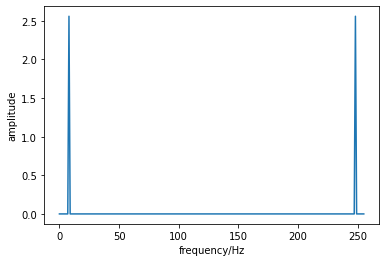

<Figure size 432x288 with 0 Axes>

In [25]:
input1 = ak.create_Single_Freq_Audio(0.02,8,256,1)
aly.FFT(input1,256).plot(0, 256)

For an audio with a sampling rate of $256Hz$, the number of points of the Fourier transform $N=256$ is taken to calculate the amplitude spectrum, then each frequency point represents a real frequency of $1Hz$. The frequency points $k=0$ to $k=255$ of the amplitude spectrum cover all the power information from $0Hz$ to $255Hz$. We find two peaks in the amplitude spectrum, where the left peak appears at the frequency $8Hz$ corresponding to the frequency of the monotone. The amplitude spectrum of the real signal is evenly symmetric about $\omega=0$, so there is also a peak at the frequency point corresponding to $-8Hz$. After a periodic extension with a sampling rate of $256Hz$, the peak at $-8Hz$ appears at the frequency point corresponding to $256 - 8 = 248 Hz$, i.e. the peak on the right side of the power spectrum.

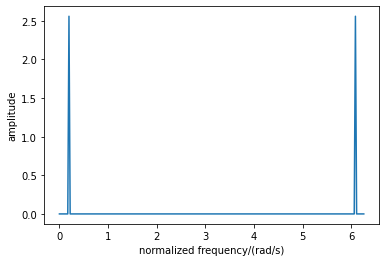

<Figure size 432x288 with 0 Axes>

In [26]:
import numpy as np

aly.FFT(input1,256).plot(0, 2*np.pi, xlabel="normalized frequency/(rad/s)")

If we use the normalized frequencies as x-axis, we find that the amplitude spectrum is symmetric about $\omega=\pi$. In fact, if we plot the amplitude spectrum of $\omega\in (-∞,∞)$, then we can also find that the amplitude spectrum is periodic with $\omega=2\pi$ and is evenly symmetric about $\omega=n\pi, n\in \mathbb Z$.

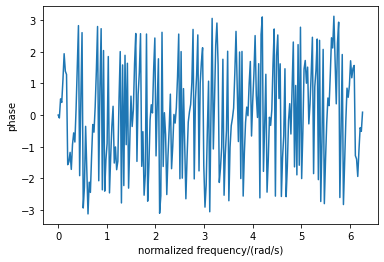

<Figure size 432x288 with 0 Axes>

In [27]:
import numpy as np

aly.FFT(input1,256).plot(0, 2*np.pi, plot_type = "phase", xlabel="normalized frequency/(rad/s)")

The phase spectrum of the real signal is also symmetric and also has a period of $\omega=2\pi$, but it is oddly symmetric about $\omega=n\pi, n\in \mathbb Z$.

# Energy spectrum and power spectrum

In addition to the frequency spectrum, **the energy spectrum and the power spectrum** are also functions that can characterize a signal in the frequency domain. The theoretical basis of the energy spectrum and power spectrum is Perceval's theorem, where the signal energy in the time domain is equal to the signal energy in the frequency domain. For finite-energy signals, according to Parseval's theorem, the energy is $E=\displaystyle\int_{-∞}^∞x^2(t)dt=\int_{-∞}^∞|X(j\omega)|^2d\omega$, and the energy spectral density is then $G(j\omega)=|X(j\omega)|^2$. For a finite-power signal, $x(t)$ is first truncated to a truncated signal of length equal to T $x_T(t),-T/2<t<T/2$ to make it finite-energy. According to Parseval's theorem, its energy is $E=\displaystyle\int_{-∞}^{∞}x_T^2(t)dt=\int_{-∞}^{∞}|X_T(j\omega)|^2d\omega$, and the signal power is $P=\displaystyle\lim_{T\ rightarrow ∞}\frac{1}{T}\int_{-∞}^{∞}|X_T(j\omega)|^2d\omega$, then there is a power spectral density $P(j\omega)=\displaystyle\lim_{T\rightarrow ∞}\frac{1}{T}|X_T(j \omega)|^2$.

Since we truncate the audio signal by windowing, all signals are finite-energy and finite-power signals. We thus only concerned with their power spectral density, which is calculated as $P[k]=\frac{1}{N_{max}}|X[k]|^2$.

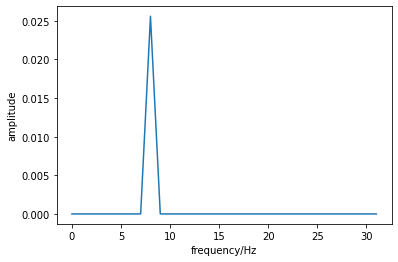

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt

input1 = ak.create_Single_Freq_Audio(0.02,8,256,1)
aly.PSD(input1, 256).plot(0,32,xlabel="frequency/Hz")

The power spectrum can also be expressed in the form of gain.

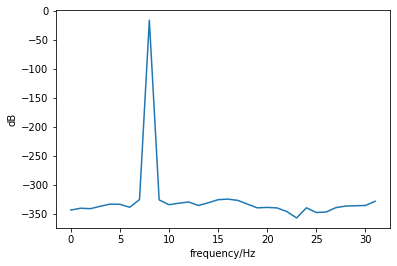

<Figure size 432x288 with 0 Axes>

In [29]:
aly.PSD(input1, 256, dB=True).plot(0,32,xlabel="frequency/Hz")

When there are two frequency components in the signal at the same time, the power information of both of them will be reflected in the power spectrum.

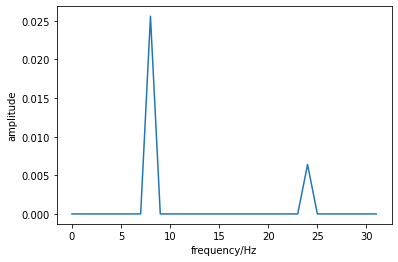

<Figure size 432x288 with 0 Axes>

In [30]:
input2 = ak.create_Single_Freq_Audio(0.01,24,256,1)
aly.PSD(input1 + input2, 256).plot(0,32,xlabel="frequency/Hz")

The power spectral density on $16Hz$ is a quarter of that on $8Hz$ since the amplitude of input2 is half that of input1.

# Frequency domain characteristics of noise

Unlike deterministic periodic signals and musical tones with distinct pitches, noise has no distinct pitch, i.e., no distinct periodicity. While musical tones can show distinct peaks in the amplitude and power spectrum, the frequency components of noise show a continuous and random distribution.

The frequency components of white noise are uniformly distributed over the entire frequency range.

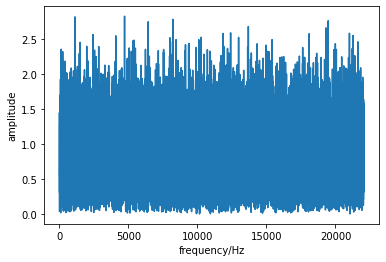

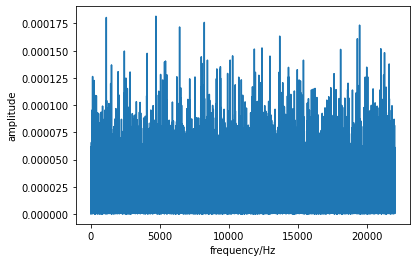

(None, None)

<Figure size 432x288 with 0 Axes>

In [31]:
monotone_without_wn = ak.create_Single_Freq_Audio(0.02,440,44100,1)
monotone_with_wn = monotone_without_wn.addWgn(10)   #Add Gaussian white noise with a signal-to-noise ratio of 10 dB to a monotone
wn = monotone_with_wn - monotone_without_wn #Subtract monotone, leaving only white noise
aly.FFT(wn).plot(), aly.PSD(wn).plot()